In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
df = pd.read_csv("D:\\deep learning\\ESC-50-master\\meta\\esc50.csv")
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [ ]:
df

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [ ]:
df1=df.sort_values(by="target")

In [ ]:
df1

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1031,3-155312-A-0.wav,3,0,dog,True,155312,A
954,3-144028-A-0.wav,3,0,dog,True,144028,A
923,3-136288-A-0.wav,3,0,dog,True,136288,A
522,2-122104-B-0.wav,2,0,dog,True,122104,B
...,...,...,...,...,...,...,...
1959,5-253094-C-49.wav,5,49,hand_saw,False,253094,C
1960,5-253094-D-49.wav,5,49,hand_saw,False,253094,D
1961,5-253101-A-49.wav,5,49,hand_saw,False,253101,A
1963,5-253101-C-49.wav,5,49,hand_saw,False,253101,C


In [ ]:
df1["filename"]

0        1-100032-A-0.wav
1031     3-155312-A-0.wav
954      3-144028-A-0.wav
923      3-136288-A-0.wav
522      2-122104-B-0.wav
              ...        
1959    5-253094-C-49.wav
1960    5-253094-D-49.wav
1961    5-253101-A-49.wav
1963    5-253101-C-49.wav
1510    4-198360-C-49.wav
Name: filename, Length: 2000, dtype: object

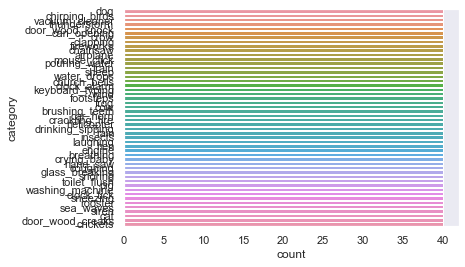

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(y= df['category'],orient='v')
plt.show()

In [ ]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from librosa import display
import os

In [ ]:
labels = list(df['category'].unique())

In [ ]:
labels

['dog',
 'chirping_birds',
 'vacuum_cleaner',
 'thunderstorm',
 'door_wood_knock',
 'can_opening',
 'crow',
 'clapping',
 'fireworks',
 'chainsaw',
 'airplane',
 'mouse_click',
 'pouring_water',
 'train',
 'sheep',
 'water_drops',
 'church_bells',
 'clock_alarm',
 'keyboard_typing',
 'wind',
 'footsteps',
 'frog',
 'cow',
 'brushing_teeth',
 'car_horn',
 'crackling_fire',
 'helicopter',
 'drinking_sipping',
 'rain',
 'insects',
 'laughing',
 'hen',
 'engine',
 'breathing',
 'crying_baby',
 'hand_saw',
 'coughing',
 'glass_breaking',
 'snoring',
 'toilet_flush',
 'pig',
 'washing_machine',
 'clock_tick',
 'sneezing',
 'rooster',
 'sea_waves',
 'siren',
 'cat',
 'door_wood_creaks',
 'crickets']

In [ ]:
df2 = df1[['target', 'category']]

In [ ]:
df2

,target,category
0,0,dog
1031,0,dog
954,0,dog
923,0,dog
522,0,dog
...,...,...
1959,49,hand_saw
1960,49,hand_saw
1961,49,hand_saw
1963,49,hand_saw


In [ ]:
df2 = df2.drop_duplicates(subset=['target', 'category'])

In [ ]:
df2

,target,category
0,0,dog
213,1,rooster
1580,2,pig
422,3,cow
1179,4,frog
229,5,cat
1576,6,hen
1882,7,insects
380,8,sheep
1983,9,crow


In [ ]:
files = dict()
for i in range(len(labels)):
    tmp = df[df['category'] == labels[i]][:1].reset_index()
    path = 'D:\\deep learning\\ESC-50-master\\audio\\{}'.format(tmp['filename'][0])
    files[labels[i]] = path

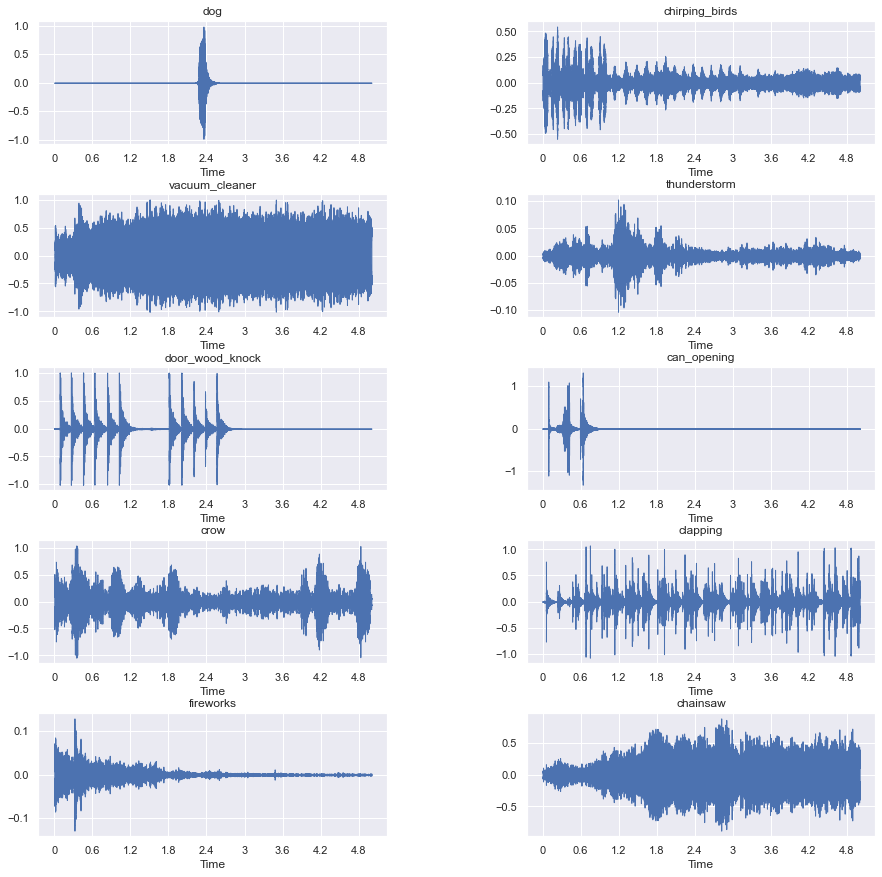

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels[:10]):
    fn = files[label]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, sample_rate = librosa.load(fn)
    display.waveshow(data, sr= sample_rate)

In [ ]:
fn='D:\\deep learning\\ESC-50-master\\audio\\2-122104-B-0.wav'
audio, sample_rate = librosa.load(fn, res_type='kaiser_fast') 
mfccs = (librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40))
t = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio),sr=sample_rate)
m = librosa.feature.melspectrogram(y=audio ,sr=sample_rate)
s = np.abs(librosa.stft(audio))
c = librosa.feature.chroma_stft(S=s, sr=sample_rate)

In [ ]:
mfccs.shape

(40, 216)

In [ ]:
t.shape
m.shape

(128, 216)

In [ ]:
c.shape

(12, 216)

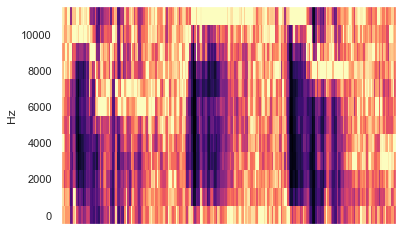

In [ ]:

librosa.display.specshow(c, y_axis='linear')


In [ ]:
a=[]
tonnets=[]
me=[]
ch=[]
a.append(mfccs)
tonnets.append(t)
me.append(m)
ch.append(c)

In [ ]:
dict={'Mfcc':a,'tonnetz':tonnets,'melspectogram':me,'chroma_stft':ch}

In [ ]:
extracted_features_single= pd.DataFrame(dict)
extracted_features_single.head()

,Mfcc,tonnetz,melspectogram,chroma_stft
0,"[[-449.6543, -429.87326, -429.43335, -429.4954...","[[0.046678147582606085, 0.012278870914834919, ...","[[0.029717468, 0.021317888, 0.012764242, 0.056...","[[0.66209376, 0.8521304, 0.88667667, 0.7893907..."


In [ ]:
single_fea1=np.array(extracted_features_single['Mfcc'].tolist())
single_fea1.shape

(1, 40, 216)

In [ ]:
single_fea2=np.array(extracted_features_single['tonnetz'].tolist())
single_fea2.shape

(1, 6, 216)

In [ ]:
single_fea3=np.array(extracted_features_single['melspectogram'].tolist())
single_fea3.shape

(1, 128, 216)

In [ ]:
single_fea4=np.array(extracted_features_single['chroma_stft'].tolist())
single_fea4.shape

(1, 12, 216)

In [ ]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs

In [ ]:
def extract_features2(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mel = (librosa.feature.melspectrogram(y=audio ,sr=sample_rate))
     
    return mel

In [ ]:
def extract_features3(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    s = np.abs(librosa.stft(audio))
    c = librosa.feature.chroma_stft(S=s, sr=sample_rate)
    #mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return c

In [ ]:
fulldatasetpath = "D:\\deep learning\\ESC-50-master\\audio\\"

In [ ]:
X = []
y = []
# Iterate through each sound file and extract the features 
for index, row in df.iterrows():
    file_name = os.path.join(fulldatasetpath,str(row["filename"]))
    
    class_label = row["target"]
    data = extract_features(file_name)
    X.append(data)
    y.append(class_label)

In [ ]:
d = {'Features':X,'class':y}

In [ ]:
extracted_features_df= pd.DataFrame(d, columns=['Features','class'])
extracted_features_df.head()

,Features,class
0,"[[-629.03265, -629.03265, -629.03265, -629.032...",0
1,"[[-199.46013, -180.08215, -185.94978, -198.387...",14
2,"[[-98.50939, -76.07503, -81.16424, -79.17356, ...",36
3,"[[-7.582925, 16.752972, 17.415335, 14.373393, ...",36
4,"[[-473.4061, -444.94675, -441.7069, -432.7292,...",19


In [ ]:
extracted_features_df['Features'][1]

array([[-199.46013   , -180.08215   , -185.94978   , ..., -209.80316   ,
        -204.37112   , -207.65556   ],
       [  -8.256139  ,   -4.919419  ,   -3.7486098 , ...,   12.471603  ,
          20.448952  ,   31.783108  ],
       [ -58.371994  ,  -53.36612   ,  -59.72476   , ...,  -69.86039   ,
         -63.53764   ,  -51.152935  ],
       ...,
       [  10.619265  ,   13.822255  ,   18.995403  , ...,   -1.4410939 ,
          -3.8219008 ,   -4.082913  ],
       [  -1.9928677 ,   -7.235595  ,  -12.922831  , ...,    2.6990538 ,
          -0.97676593,    2.1793709 ],
       [   6.6480103 ,    9.605652  ,   11.250654  , ...,   -2.052101  ,
           1.7287511 ,    7.4548464 ]], dtype=float32)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(2000, 40, 216)

In [ ]:
y.shape

(2000,)

In [ ]:
y

array([ 0, 14, 36, ..., 25,  8,  0])

In [ ]:
y=y.reshape(-1,1)

In [ ]:
### Label Encoding
#y=np.array(pd.get_dummies(y))
### Label Encoder
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
y=OneHotEncoder().fit_transform(y).toarray()

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y.shape

(2000, 50)

In [ ]:
from sklearn.preprocessing import StandardScaler
tran = StandardScaler()
X= tran.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

array([[[-6.29032654e+02, -6.29032654e+02, -6.29032654e+02, ...,
         -6.29032654e+02, -6.29032654e+02, -6.29032654e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.62773315e+02, -1.43250122e+02, -1.45703247e+02, ...,
         -1.01867760e+02, -9.92138901e+01, -9.86204376e+01],
        [ 6.10286865e+01,  6.59645386e+01,  7.07160721e+01, ...,
          4.59985466e+01,  3.64512558e

In [ ]:
X_train.shape

(1600, 40, 216)

In [ ]:
X_test.shape

(400, 40, 216)

In [ ]:
y_train.shape

(1600, 50)

In [ ]:
y_test.shape

(400, 50)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],40,216,1))
X_test=np.reshape(X_test,(X_test.shape[0],40,216,1))

In [ ]:
X_train.shape

(1600, 40, 216, 1)

In [ ]:
X_test.shape

(400, 40, 216, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
import tensorflow.keras.layers as layers
import IPython.display as ipd

In [ ]:
INPUTSHAPE = (40,216,1)


In [ ]:
num_labels=y.shape[1]


In [ ]:
model = Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(50 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 38, 214, 32)       320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 19, 107, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 17, 105, 128)      36992     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 9, 53, 128)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 9, 53, 128)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 51, 128)       

In [ ]:
import tensorflow as tf

In [ ]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                             # verbose=1, save_best_only=True)
history = model.fit(X_train,y_train ,validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/40
200/200 [==============================] - 34s 156ms/step - loss: 3.6328 - acc: 0.0644 - val_loss: 3.1331 - val_acc: 0.1225
Epoch 2/40
200/200 [==============================] - 28s 141ms/step - loss: 2.9274 - acc: 0.1713 - val_loss: 2.7137 - val_acc: 0.2300
Epoch 3/40
200/200 [==============================] - 27s 134ms/step - loss: 2.5115 - acc: 0.2781 - val_loss: 2.4299 - val_acc: 0.3025
Epoch 4/40
200/200 [==============================] - 28s 140ms/step - loss: 2.1614 - acc: 0.3725 - val_loss: 2.1169 - val_acc: 0.3950
Epoch 5/40
200/200 [==============================] - 21s 105ms/step - loss: 1.9466 - acc: 0.4156 - val_loss: 2.0669 - val_acc: 0.4225
Epoch 6/40
200/200 [==============================] - 22s 109ms/step - loss: 1.7556 - acc: 0.4688 - val_loss: 1.8981 - val_acc: 0.5000
Epoch 7/40
200/200 [==============================] - 21s 107ms/step - loss: 1.5527 - acc: 0.5125 - val_loss: 1.7473 - val_acc: 0.5275
Epoch 8/40
200/200 [==============================] - 2

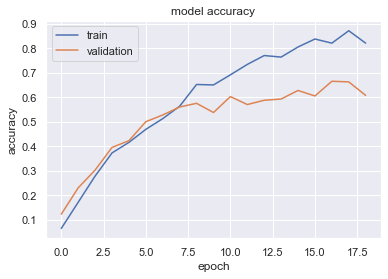

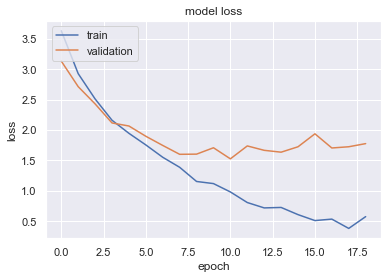

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# model=Sequential()
# ###first layer
# model.add(Dense(100,input_shape=(40,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###second layer
# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###third layer
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.6075000166893005


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir="logs"

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6824.

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_pred=model.predict(X_test)

13/13 [==============================] - 4s 115ms/step


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
y_pred

array([[4.59375178e-06, 7.82737652e-10, 3.82884946e-06, ...,
        9.86172566e-09, 2.87060887e-02, 4.21061372e-08],
       [3.94195430e-02, 1.55461375e-02, 7.57725686e-02, ...,
        6.11587097e-07, 3.25852237e-03, 9.82195023e-04],
       [7.19776835e-06, 1.28243514e-07, 9.74185852e-08, ...,
        1.62434684e-11, 5.96933987e-08, 2.05426454e-03],
       ...,
       [1.84568246e-15, 3.21575273e-18, 9.71754212e-14, ...,
        8.73199625e-13, 5.21181221e-07, 2.67471645e-08],
       [5.06745664e-07, 7.90808735e-06, 4.59946468e-02, ...,
        5.60812559e-03, 1.18701082e-05, 1.29687920e-04],
       [3.16758468e-12, 3.44340223e-34, 1.88195877e-15, ...,
        1.21959537e-01, 3.57847583e-08, 1.19514537e-17]], dtype=float32)

In [ ]:
round_off=np.round_(y_pred)

In [ ]:
round_off

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Confusion Matrix
[[ 7  0  0 ...  0  0  0]
 [ 1  4  0 ...  0  0  0]
 [ 4  0  6 ...  0  0  0]
 ...
 [ 2  0  0 ...  4  0  0]
 [ 2  0  0 ...  0 12  0]
 [ 1  0  0 ...  0  0  2]]


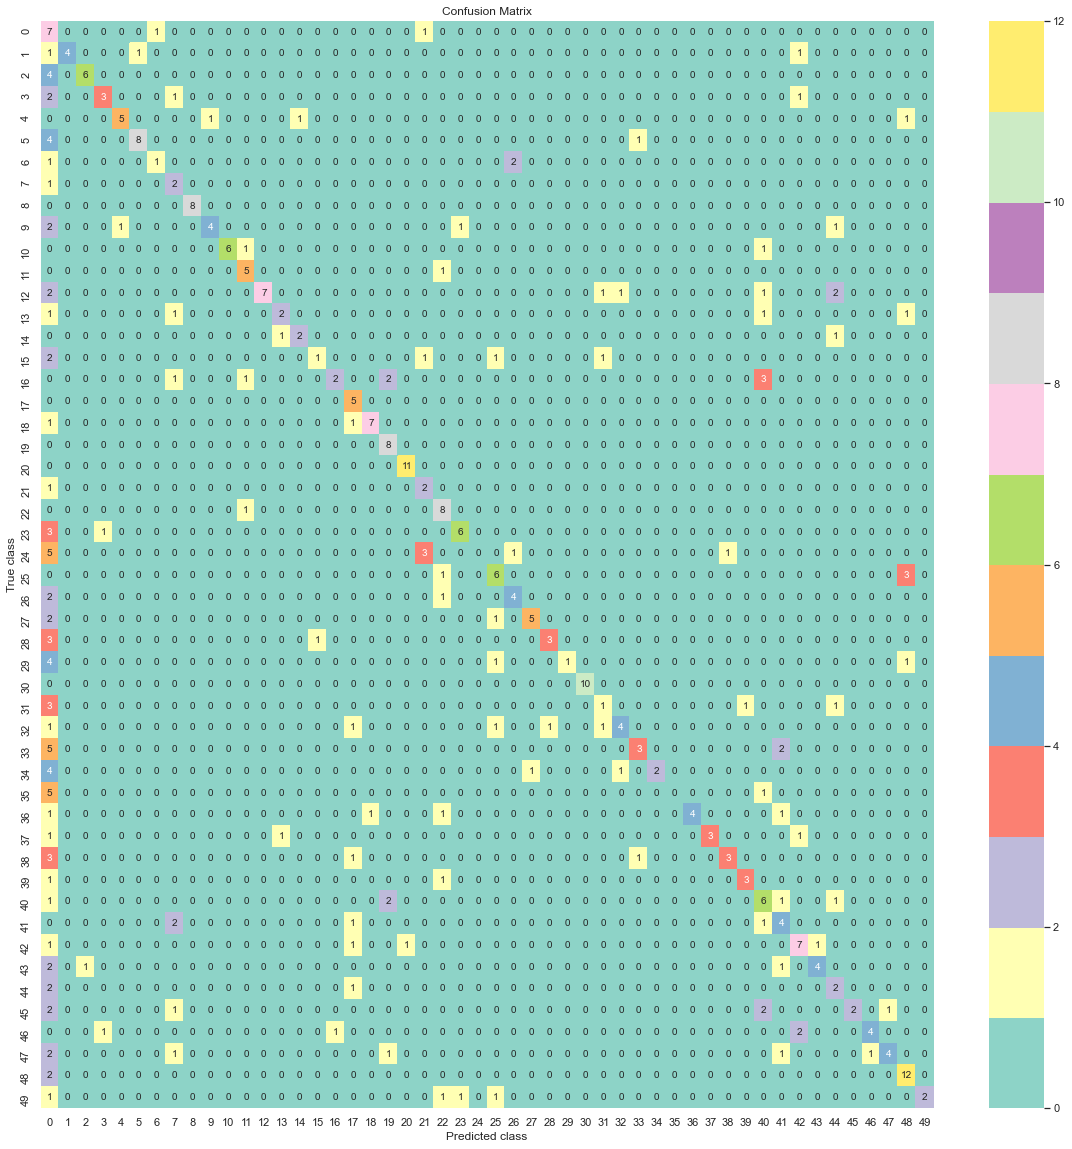

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()